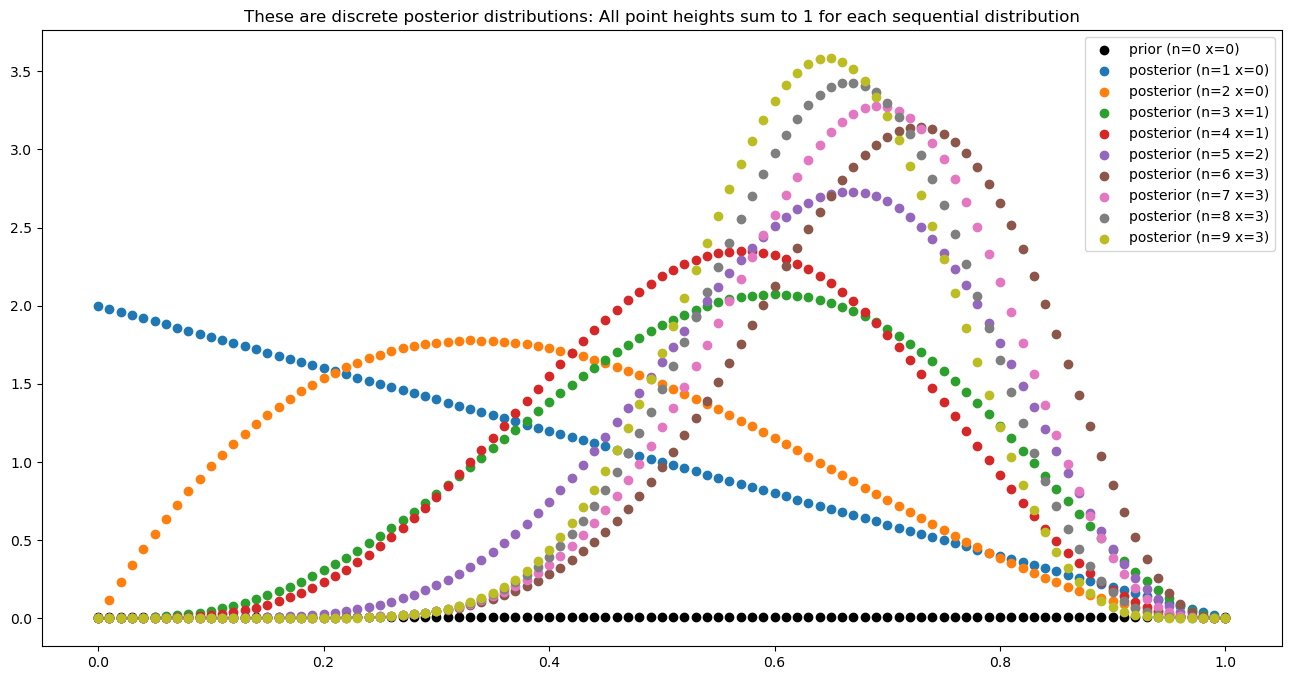

In [2]:
# Q1

import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

parameter_domain = np.linspace(0,1,101) 
prior = np.ones(101)/101 # proportional to beta(1,1)

observations = 0,0,1,0,1,1,0,0,0
n,x = 0,0
plt.figure(figsize=(16,8))
plt.scatter(parameter_domain, prior, label="prior (n="+str(n)+" x="+str(x)+")", color='k')
plt.title("These are discrete posterior distributions: All point heights sum to 1 for each sequential distribution")
for observation in observations:
    n += 1
    x += observation
    
    posterior = stats.beta(x + n, 1 + n - x) # n=1 for bernoulli distr
    plt.scatter(parameter_domain, posterior.pdf(parameter_domain), label="posterior (n="+str(n)+" x="+str(x)+")")

plt.legend();

Text(0.5, 1.0, 'Proportion of successes obtained over 40 iterations')

<Figure size 1600x800 with 0 Axes>

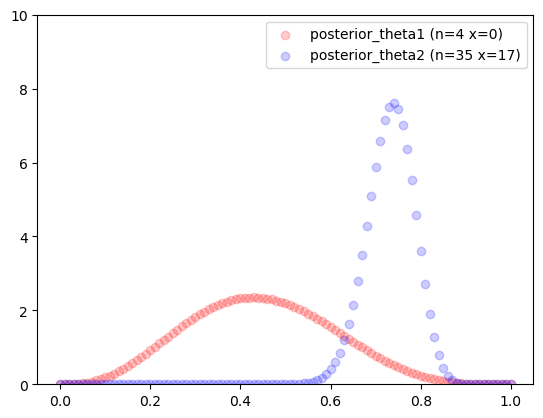

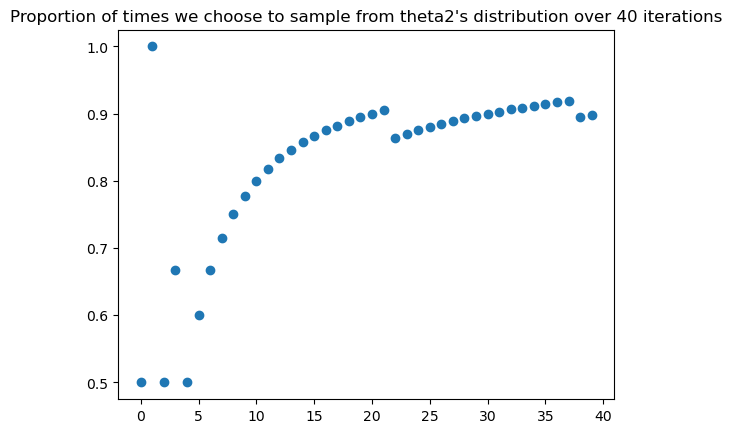

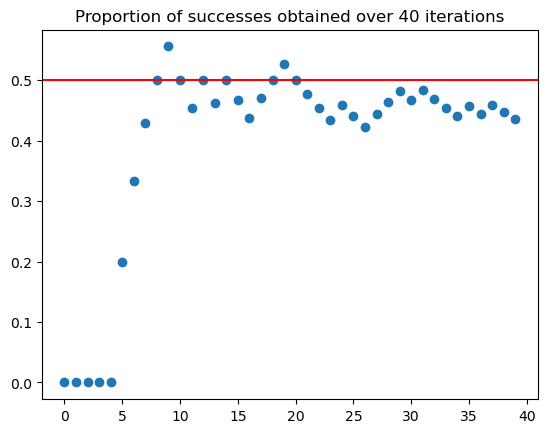

In [42]:
# Q2
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
parameter_domain = np.linspace(0,1,101) 
theta1 = 0.1
theta2 = 0.5
m = 40
n_1 = 0; x_1 = 0
n_2 = 0; x_2 = 0
p2gt1 = [0]*m
regret = [0]*m
# prior assumption is thetas are sampled from uniform distr
# initial posteriors (which is actually the prior)
posterior_1 = stats.beta(1, 1)
posterior_2 = stats.beta(1, 1)
plt.figure(figsize=(16,8))
fig,ax = plt.subplots()

# ax.title("These are discrete posterior distributions: All point heights sum to 1" + 
          # " for each sequential distribution")
np.random.seed(365)
def animate(t):
    global posterior_1, posterior_2, x_1, x_2, n_1, n_2, p2gt1
    ax.clear()
    ax.set_ylim(0,10)
    if (t == 0):
        lin1 = ax.scatter(parameter_domain, posterior_1.pdf(parameter_domain), 
            label="prior_theta1 (n="+str(n_1)+" x="+str(x_1)+")", color='red', alpha=0.2)
        lin2 = ax.scatter(parameter_domain, posterior_2.pdf(parameter_domain), 
            label="prior_theta2 (n="+str(n_2)+" x="+str(x_2)+")", color='blue', alpha=0.2)
        p2gt1[t] = 0.5
        regret[t] = 0
    else:
        samp_1 = float(posterior_1.rvs(1))
        samp_2 = float(posterior_2.rvs(1))
        if (samp_2 > samp_1):
            result = stats.bernoulli(theta2).rvs(1)
            x_2 += int(result)
            n_2 += 1
            posterior_2 = stats.beta(x_2 + n_2, 1 + n_2 - x_2)
        else:
            result = stats.bernoulli(theta1).rvs(1)
            x_1 += int(result)
            n_1 += 1
            posterior_1 = stats.beta(x_1 + n_1, 1 + n_1 - x_1)
        lin1 = ax.scatter(parameter_domain, posterior_1.pdf(parameter_domain), 
                    label="posterior_theta1 (n="+str(n_1)+" x="+str(x_1)+")", color='red', alpha=0.2)
        lin2 = ax.scatter(parameter_domain, posterior_2.pdf(parameter_domain), 
                    label="posterior_theta2 (n="+str(n_2)+" x="+str(x_2)+")", color='blue', alpha=0.2)
        p2gt1[t] = n_2/t
        regret[t] = (x_2 + x_1)/t

    leg = ax.legend()
    return lin1, lin2, leg
    
ani = FuncAnimation(fig, animate, interval=100, blit=True, repeat=True, frames=m, repeat_delay = 500) 
ani.save("HW2_Q2.gif", dpi=100, writer=PillowWriter(fps=2))
# look at HW2_Q2.gif in my repo to see the learning process from the start(t = 0) to end (t = 39)
plt.figure()
plt.scatter(range(m), p2gt1)
plt.title("Proportion of times we chose to sample from theta2's distribution over 40 iterations")

plt.figure()
plt.scatter(range(m), regret)
plt.axhline(y=0.5, color='r', linestyle='-')
plt.title("Proportion of successes obtained over 40 iterations")

Text(0.5, 1.0, 'Proportion of successes obtained over 1000 iterations using Analysis 2')

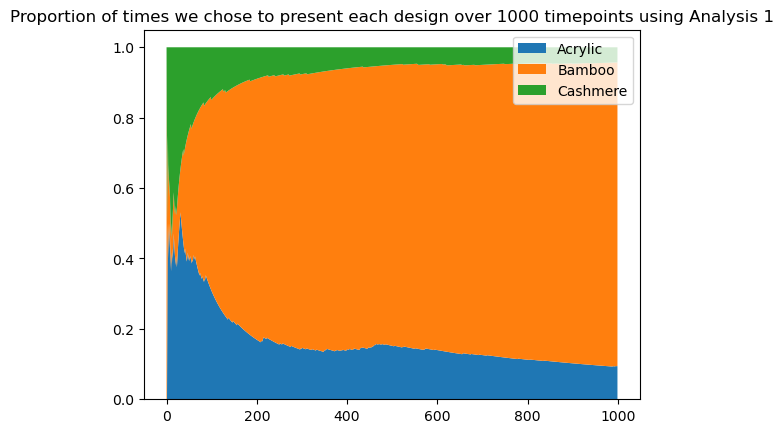

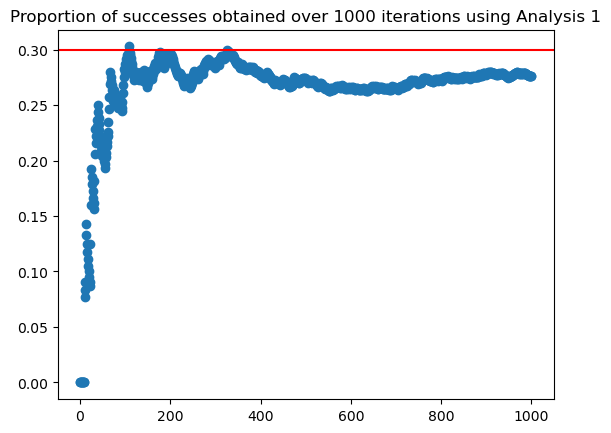

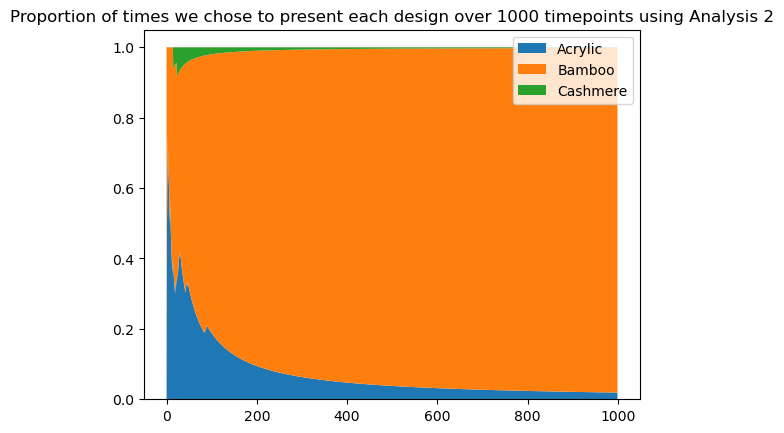

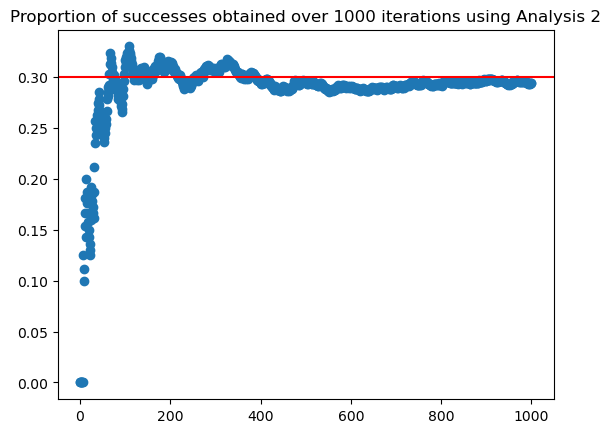

In [57]:
# Q3
import numpy as np; from scipy import stats; import matplotlib.pyplot as plt

thetas = np.array([0.2, 0.3, 0.15])
m = 1000
# coin flips
np.random.seed(365)
obs_1 = stats.bernoulli(thetas[0]).rvs(m)
obs_2 = stats.bernoulli(thetas[1]).rvs(m)
obs_3 = stats.bernoulli(thetas[2]).rvs(m)
# analysis 1: 
# prior assumption is thetas are sampled from uniform distr
# initial posteriors (which is actually the prior)
posterior_1 = stats.beta(1, 1)
posterior_2 = stats.beta(1, 1)
posterior_3 = stats.beta(1, 1)
x1s = np.array([(0, 0, 0)]*m)
n1s = np.array([(0, 0, 0)]*m)
# analysis 2:
alphas = np.array([1, 1, 1])
posterior_dir = stats.dirichlet(alphas)
x2s = np.array([(0, 0, 0)]*m)
n2s = np.array([(0, 0, 0)]*m)
np.random.seed(365)
for t in range(m):
    samp1_1 = float(posterior_1.rvs(1))
    samp1_2 = float(posterior_2.rvs(1))
    samp1_3 = float(posterior_3.rvs(1))
    samp2_dir = posterior_dir.rvs(1)
    # analysis 1
    x1s[t] = x1s[t-1]
    n1s[t] = n1s[t-1]
    if (samp1_1 >= samp1_2 and samp1_1 >= samp1_3):
        result = obs_1[t]
        x1s[t][0] += int(result)
        n1s[t][0] += 1 
        posterior_1 = stats.beta(x1s[t][0] + n1s[t][0], 1 + n1s[t][0] - x1s[t][0])
    if (samp1_2 >= samp1_1 and samp1_2 >= samp1_3):
        result = obs_2[t]
        x1s[t][1] += int(result)
        n1s[t][1] += 1
        posterior_2 = stats.beta(x1s[t][1] + n1s[t][1], 1 + n1s[t][1] - x1s[t][1])
    if (samp1_3 >= samp1_1 and samp1_3 >= samp1_2):
        result = obs_3[t]
        x1s[t][2] += int(result)
        n1s[t][2] += 1
        posterior_3 = stats.beta(x1s[t][2] + n1s[t][2], 1 + n1s[t][2] - x1s[t][2])
    
    #analysis 2
    x2s[t] = x2s[t-1]
    n2s[t] = n2s[t-1]
    samp_dir = posterior_dir.rvs(1)[0]
    if (samp_dir[0] >= samp_dir[1] and samp_dir[0] >= samp_dir[2]):
        result = obs_1[t]
        x2s[t][0] += int(result)
        n2s[t][0] += 1
    if (samp_dir[1] >= samp_dir[0] and samp_dir[1] >= samp_dir[2]):
        result = obs_2[t]
        x2s[t][1] += int(result)
        n2s[t][1] += 1
    if (samp_dir[2] >= samp_dir[1] and samp_dir[2] >= samp_dir[0]):
        result = obs_3[t]
        x2s[t][2] += int(result)
        n2s[t][2] += 1
    alphas += np.array([obs_1[t], obs_2[t], obs_3[t]])
    posterior_dir = stats.dirichlet(alphas)

successive_triples = np.array([(x, x, x) for x in range(1,m+1)])
times_sampled1 = n1s/successive_triples
times_sampled2 = n2s/successive_triples
regret1 = np.array([sum(i) for i in x1s])/range(1, m+1)
regret2 = np.array([sum(i) for i in x2s])/range(1, m+1)
plt.figure()
plt.title("Proportion of times we chose to present each design over 1000 timepoints using Analysis 1")
plt.stackplot(range(m), [i[0] for i in times_sampled1], [i[1] for i in times_sampled1], 
              [i[2] for i in times_sampled1], labels=['Acrylic','Bamboo','Cashmere'])
plt.legend(loc='upper right')

plt.figure()
plt.scatter(range(m), regret1)
plt.axhline(y=0.3, color='r', linestyle='-')
plt.title("Proportion of successes obtained over 1000 iterations using Analysis 1")

plt.figure()
plt.title("Proportion of times we chose to present each design over 1000 timepoints using Analysis 2")
plt.stackplot(range(m), [i[0] for i in times_sampled2], [i[1] for i in times_sampled2], 
              [i[2] for i in times_sampled2], labels=['Acrylic','Bamboo','Cashmere'])
plt.legend(loc='upper right')


plt.figure()
plt.scatter(range(m), regret2)
plt.axhline(y=0.3, color='r', linestyle='-')
plt.title("Proportion of successes obtained over 1000 iterations using Analysis 2")

AB Testing Application: Website design \
Scenerio: There is a discount on yarn, but the company doesn't know which products to promote on their online shopping landing page in order to maximize number of sales. \
Marketing decides on 3 designs, each featuring a different type of yarn:
1. Acrylic
2. Bamboo
3. Cashmere

Which design should the company feature on their landing page? \
Based on historical data, plant-based yarns have the most sales. But maybe the discount will attract thrifty people who prefer cheaper synthetic yarns or maybe the discount will motivate customers to buy a more luxury product that would usually be too expensive. The company decides to show equal proportions of the 3 different design to their initial traffic (this is their prior). Then, they may use the Bayesian multi-armed bandit to dynamically change the allocation of website traffic among the 3 designs based on if the customer actually bought anything from the website during their session. For simplicity, each customer's behaviour is similar to an observation of a Bernoulli likelihood (purchase = 1, no purchase = 0). \

Analysis 1 is more appropriate for modelling this real-life AB test. This is because Analysis 2 restricts the dirichlet prior to having 3 parameters that add up to 1. But in real-life, these dirichlet parameters represent the probability of a purchase being made from 3 different website designs and it is possible that the probability of success of the 3 conditions add up to more or less than 1. The Bayesian multi-armed bandit effectively balances the exploration-exploitation tradeoff in this situation since it dynamically allows for the design with the highest associated purchase rate (bamboo) to be favoured (exploitation) while still allowing for Acrylic and Cashmere to be displayed (exploration) with justifiable frequency. \
It seems that Analysis 2 is more exploitative/less explorative than Analysis 1 as seen in the stack plots where Analysis 1 allows for a higher amount of representation from Acrylic and Cashmere and in the scatter plots where Analysis 2 sits closer to the theoretical optimal proportion of purchases.
